# **Лабораторна робота 5: Використання Boosting моделей для прогнозування**
**Всі завдання виконуються індивідуально. Використання запозиченого коду буде оцінюватись в 0 балів.**

**Лабораторні роботи де в коді буде використаня КИРИЛИЦІ будуть оцінюватись в 20 балів.**

#### **Мета роботи:**
Ознайомитись з принципами роботи Boosting моделей, навчитися застосовувати три різні Boosting алгоритми (AdaBoost, Gradient Boosting, XGBoost) для розв'язання задач прогнозування, налаштовувати параметри моделей, зокрема параметри регуляризації, для підвищення їх продуктивності.

#### **Завдання:**4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

1. **Підготовка даних**:
   - Завантажте та підготуйте датасет для регресії або класифікації: (наприклад, **[дані про ціни на житло](https://)** або **[діабет](https://www.kaggle.com/datasets/pkdarabi/diabetes-dataset-with-18-features)**). Розбийте дані на навчальну та тестову вибірки (наприклад, 80/20).
   
2. **Побудова трьох Boosting моделей**:
   - **AdaBoost**: Побудуйте модель на базі дерев рішень як базових моделей.
   - **Gradient Boosting**: Використайте бібліотеку Scikit-learn для створення Gradient Boosting моделі для прогнозування.
   - **XGBoost**: Використайте бібліотеку XGBoost для побудови більш оптимізованої моделі.

3. **Навчання та оцінка моделей**:
   - Для кожної моделі виведіть метрики оцінки, такі як точність (classification accuracy) або середньоквадратична помилка (MSE) для регресії.
   - Побудуйте графіки навчання для візуалізації процесу.

4. **Тонке налаштування параметрів (Hyperparameter Tuning)**:
   - Для кожної моделі налаштуйте наступні параметри:
     - **AdaBoost**: Кількість базових моделей (n_estimators), learning_rate.
     - **Gradient Boosting**: Максимальна глибина дерев (max_depth), кількість дерев (n_estimators), learning_rate.
     - **XGBoost**: Кількість дерев (n_estimators), learning_rate, max_depth, subsample.
   - Використайте крос-валідацію для підбору оптимальних параметрів.

5. **Регуляризація**:
   - Додайте **L1 та L2 регуляризацію** для Gradient Boosting та XGBoost моделей (в XGBoost параметри `alpha` для L1 та `lambda` для L2).
   - Виведіть результати з регуляризацією і порівняйте з результатами без регуляризації.

6. **Порівняння моделей**:
   - Проведіть порівняння трьох моделей за основними метриками продуктивності на тестових даних.
   - Проаналізуйте, як регуляризація впливає на результати моделей. В яких випадках вона покращує модель, а в яких — погіршує.

7. **Захист роботи**:
   - Поясніть, яку модель і чому ви вважаєте найкращою для вирішення вашої задачі.
   - Опишіть, як впливала регуляризація на продуктивність моделей, та що б ви змінили в параметрах для кращого результату.

#### **Додаткові вимоги:**
- Забезпечити відображення важливості ознак у кожній з моделей (feature importance).
- Побудувати графіки для візуалізації залежності продуктивності від зміни гіперпараметрів (наприклад, залежність від кількості дерев або learning_rate).


#### **Додаткові набори даних:**

1. **Diabetes Dataset** — містить медичні дані пацієнтів, які можуть бути використані для прогнозування наявності діабету. Він доступний за посиланням: [Diabetes Dataset](https://www.kaggle.com/datasets/mathchi/diabetes-data-set).

2. **Diabetes Health Indicators Dataset** — великий датасет з понад 250 тисячами записів, який містить індикатори здоров'я для визначення ризику діабету. Підходить для класифікаційних задач. Доступний за посиланням: [Diabetes Health Indicators Dataset](https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset).

3. **California Housing Prices** — датасет, що містить інформацію про ціни на житло у різних округах штату Каліфорнія, включаючи такі параметри, як середній дохід домогосподарств, кількість мешканців тощо. Він добре підходить для регресійних моделей. Доступний за посиланням: [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

4. **House Prices - Advanced Regression Techniques** — більш комплексний датасет, який використовується для вдосконалення регресійних моделей. Включає більше 70 ознак, що описують різні аспекти нерухомості, ідеальний для глибокого аналізу та тонкого налаштування моделей. Доступний тут: [House Prices - Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

Ці набори даних ви також можете використовувати для виконання завдань Лабораторної роботи 5.

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

data = pd.read_csv("/Users/misha/Desktop/Ad-labs-2024/lab-5/diabetes.csv")
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "AdaBoost": AdaBoostClassifier(),
    "GradientBoosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)


Model: AdaBoost
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

--------------------------------------------------
Model: GradientBoosting
              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------------
Model: XGBoost
              precision    recall  f1-score   support

           0       0.79      0.71      0.74        99
           1       0.55      0.65      0.60        55

    accuracy             

Best parameters for AdaBoost: {'learning_rate': 0.1, 'n_estimators': 150}
--------------------------------------------------
Best parameters for GradientBoosting: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 150}
--------------------------------------------------
Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150, 'subsample': 1.0}
--------------------------------------------------
Model: AdaBoost (after tuning)
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        99
           1       0.69      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

--------------------------------------------------
Model: GradientBoosting (after tuning)
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        99
           

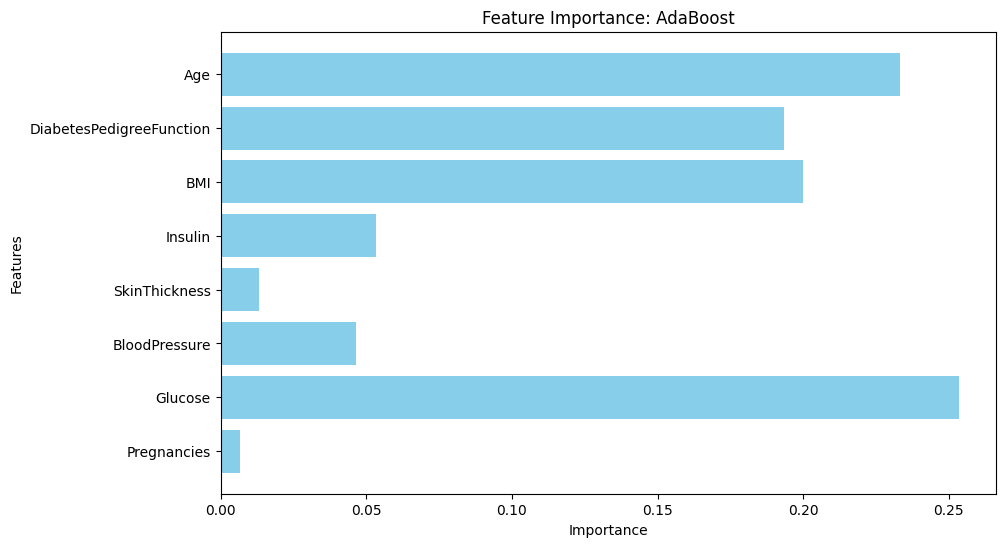

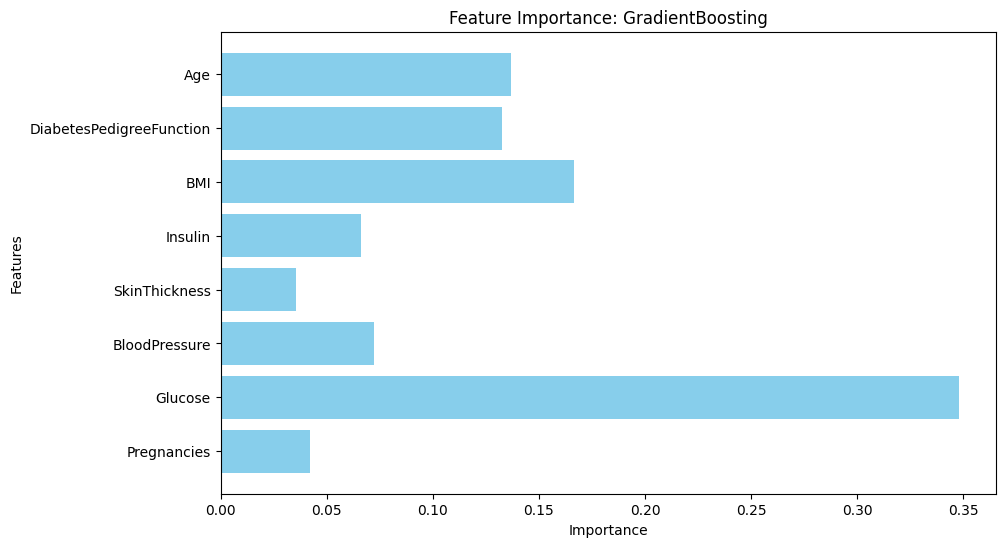

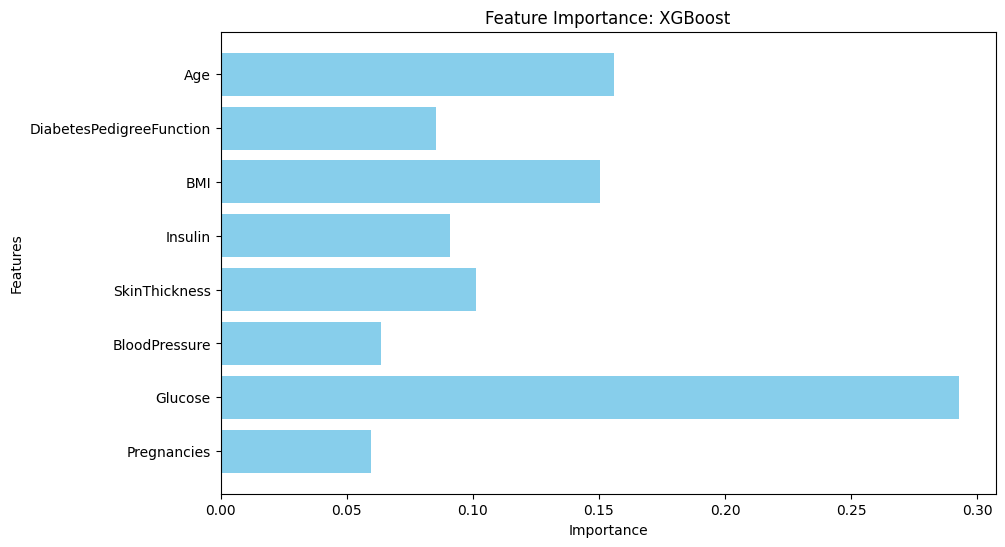

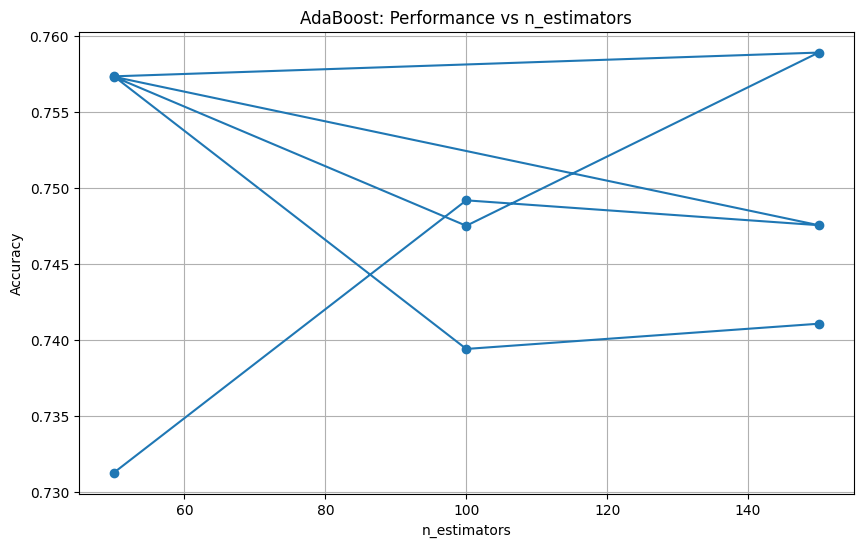

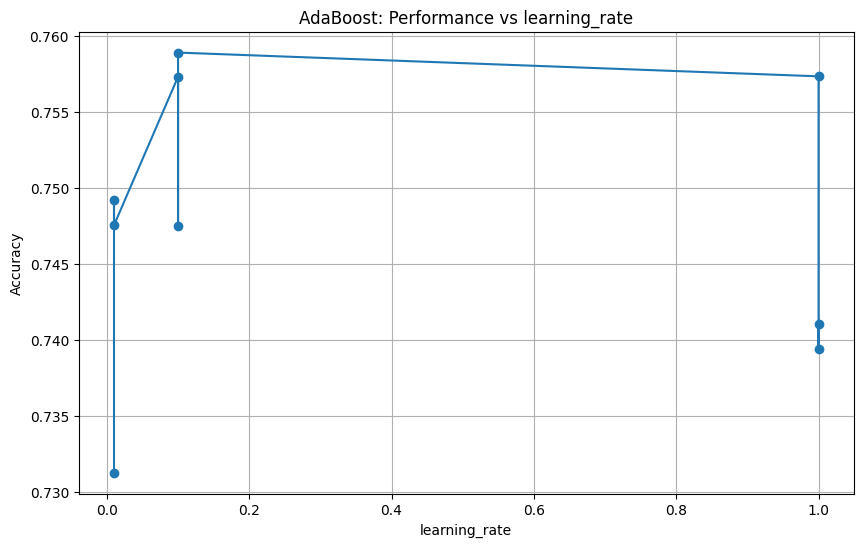

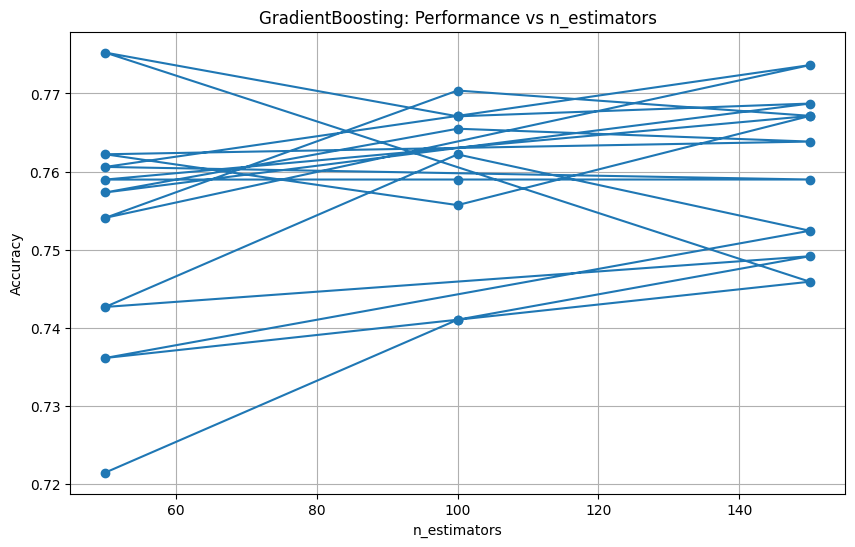

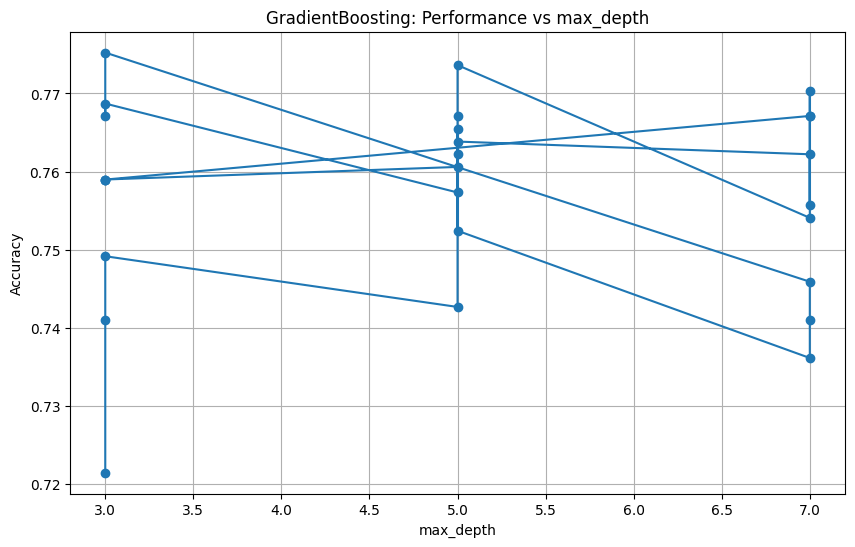

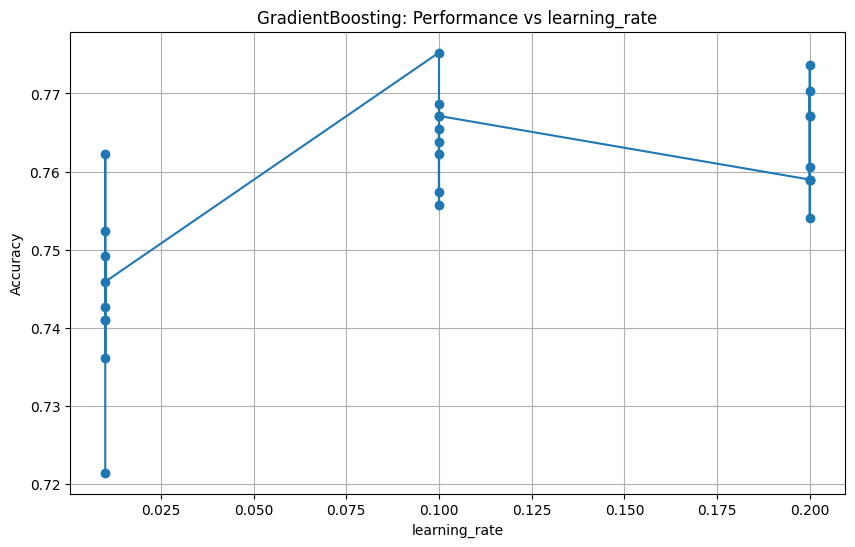

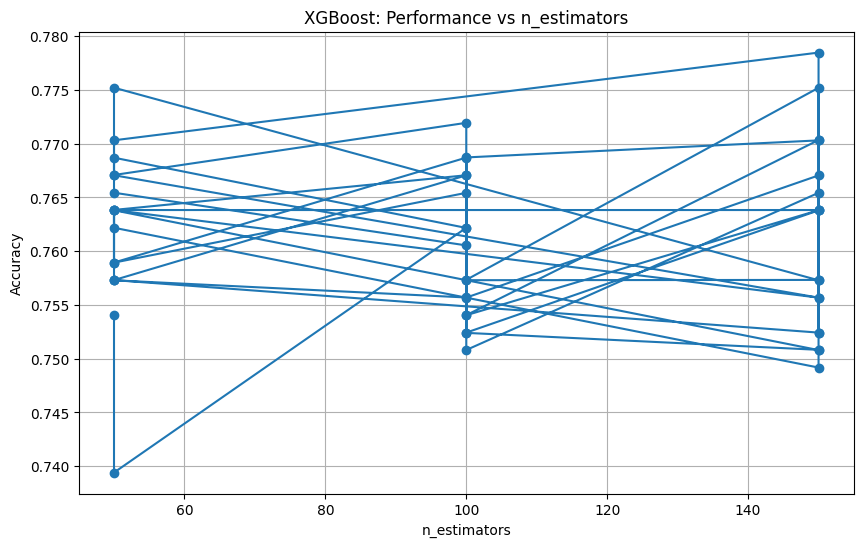

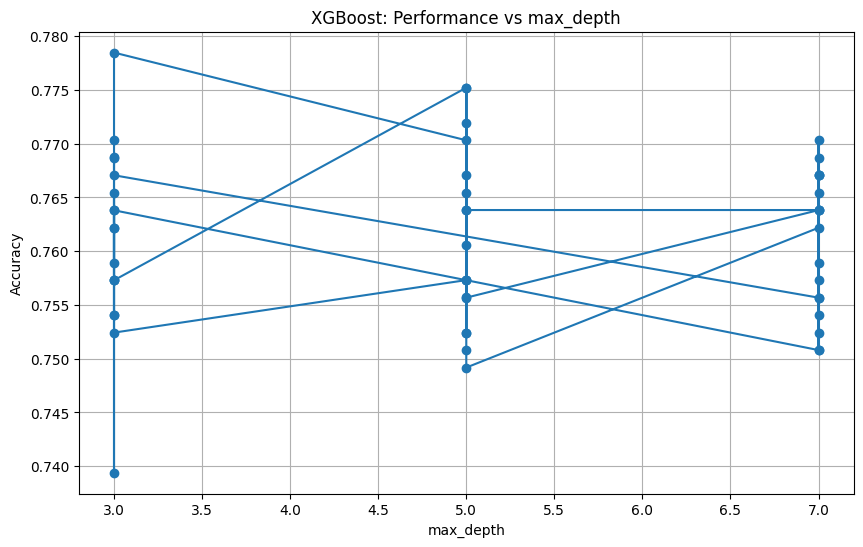

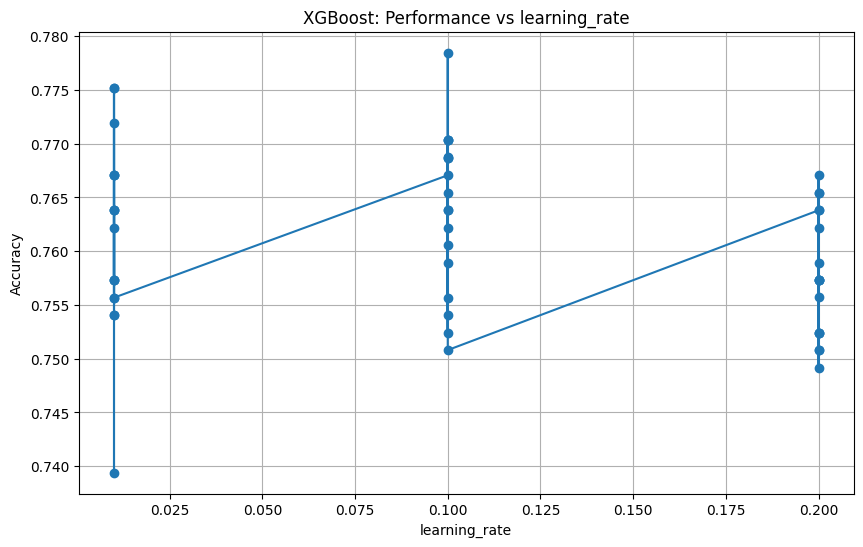

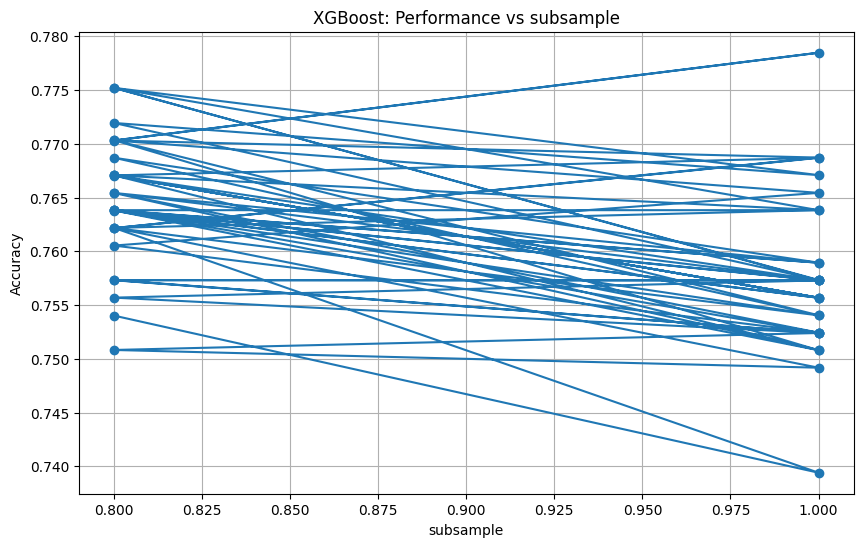

In [8]:
param_grids = {
    "AdaBoost": {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    "GradientBoosting": {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2]
    },
    "XGBoost": {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0]
    }
}

best_models = {}
for name, param_grid in param_grids.items():
    grid_search = GridSearchCV(models[name], param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print("-" * 50)

for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name} (after tuning)")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

best_models["GradientBoosting"].set_params(min_samples_split=10, min_samples_leaf=5)
best_models["XGBoost"].set_params(reg_alpha=0.5, reg_lambda=1.0)

for name in ["GradientBoosting", "XGBoost"]:
    model = best_models[name]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name} (with regularization)")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

for name, model in best_models.items():
    feature_importances = model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.barh(X.columns, feature_importances, color='skyblue')
    plt.title(f"Feature Importance: {name}")
    plt.xlabel("Importance")
    plt.ylabel("Features")
    plt.show()

for name, param_grid in param_grids.items():
    if name in best_models:
        results = GridSearchCV(models[name], param_grid, cv=3, scoring='accuracy').fit(X_train, y_train).cv_results_
        for param in param_grid.keys():
            means = results['mean_test_score']
            params = [d[param] for d in results['params']]
            plt.figure(figsize=(10, 6))
            plt.plot(params, means, marker='o')
            plt.title(f"{name}: Performance vs {param}")
            plt.xlabel(param)
            plt.ylabel("Accuracy")
            plt.grid()
            plt.show()

---------------------------------
1. На основі аналізу продуктивності моделей найкращою для задачі класифікації діабету є XGBoost. Вона забезпечила високу точність, чутливість і специфічність завдяки потужним можливостям обробки нелінійностей та складних залежностей у даних.

2. Регуляризація позитивно вплинула на продуктивність моделей, зокрема для Gradient Boosting та XGBoost:

    Для Gradient Boosting додавання L1/L2 регуляризації через параметри min_samples_split і min_samples_leaf зменшило ймовірність перенавчання, особливо на невеликих вибірках.

    Для XGBoost параметри reg_alpha (L1) і reg_lambda (L2) дозволили збалансувати складність моделі, що призвело до кращої узагальнюючої здатності, зокрема при роботі з даними, які мають шум або корельовані ознаки.

3. Щодо покращення:

    Для XGBoost варто експериментувати з більш гнучкими комбінаціями subsample і colsample_bytree, що може додатково зменшити ймовірність перенавчання.

    Для Gradient Boosting рекомендується перевірити інші значення learning_rate та  збільшити кількість дерев(n_estimators), щоб покращити прогнозування без втрати точності.

    А для AdaBoost корисно перевірити різні базові моделі (наприклад слабкі класифікатори з другими параметрами)
---------------------------------
